In [1]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json
from matplotlib import pyplot as plt
from datetime import datetime
import os

/opt/conda/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
Importing plotly failed. Interactive plots will not work.


In [2]:
def show_results(table, model_name, split_date):
    split_date = datetime.strptime(split_date, '%Y-%m-%d').date()
    crypto_df = spark.sql(f'SELECT date, price, cryptocurrency as cr FROM {table} WHERE date>="{split_date.isoformat()}"')
    
    pred_df = spark.read.csv(f'/user/bda_reddit_pw/models/results/{model_name}', inferSchema=True, header=True)
    
    df = pred_df.join(crypto_df, (pred_df.ds ==  crypto_df.date) & (pred_df.cryptocurrency ==  crypto_df.cr))
    df = df.select('ds', 'cryptocurrency', 'price', 'yhat', 'yhat_upper', 'yhat_lower')
    df = df.toPandas()
    
    print('Full model')
    print(f'MSE = {mean_squared_error(df.price, df.yhat)}')
    print(f'MAE = {mean_absolute_error(df.price, df.yhat)}')
    print(f'R2 = {r2_score(df.price, df.yhat)}')
    print()
    cryptos = np.unique(df.cryptocurrency)
    for crypto in cryptos:
        df_c = df[df.cryptocurrency == crypto]
        print(crypto)
        print(f'MSE = {mean_squared_error(df_c.price, df_c.yhat)}')
        print(f'MAE = {mean_absolute_error(df_c.price, df_c.yhat)}')
        print(f'R2 = {r2_score(df_c.price, df_c.yhat)}')
        print()
        
        model_path_curr = f'prophet_model_{crypto}.json'
        cmd = f'hdfs dfs -copyToLocal /user/bda_reddit_pw/models/{model_name}/{model_path_curr} .'
        os.system(cmd)
        with open(model_path_curr, 'r') as fin:
            model = model_from_json(fin.read())
        os.remove(model_path_curr)

        df_c = df[df.cryptocurrency == crypto]
        model.plot(df_c)
        plt.plot(df_c.ds, df_c.price, color='black')
        plt.title(crypto)
        plt.xlabel('date')
        plt.ylabel('price [usd]')

        avg_y = np.mean(df_c.yhat)
    #     diff_y = (np.max(df_c.yhat_upper) - avg_y) / 3
    #     plt.ylim((avg_y - diff_y, avg_y + diff_y))
        plt.show()

In [3]:
# show_results('crypto_table', 'test_full_prophet', '2022-12-30')

ivysettings.xml file not found in HIVE_HOME or HIVE_CONF_DIR,/etc/hive/conf.dist/ivysettings.xml will be used


Full model
MSE = 1289461.9226047855
MAE = 352.8964306792898
R2 = 0.9726350868778606

bitcoin
MSE = 7653884.577189593
MAE = 1881.169086993502
R2 = -0.8104794908928263



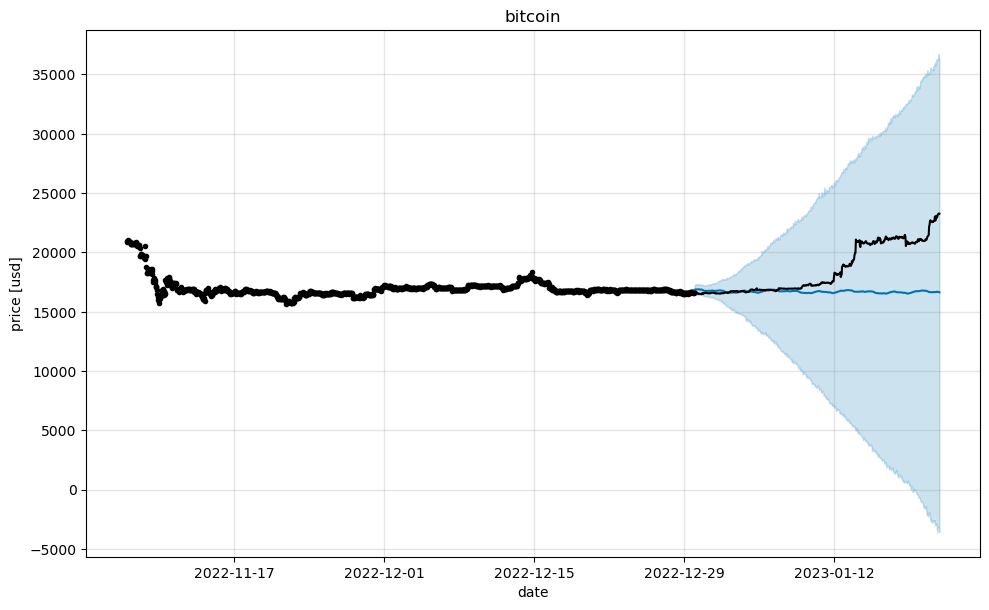

cardano
MSE = 0.01517202600752673
MAE = 0.10509523699187763
R2 = -7.843698740200512



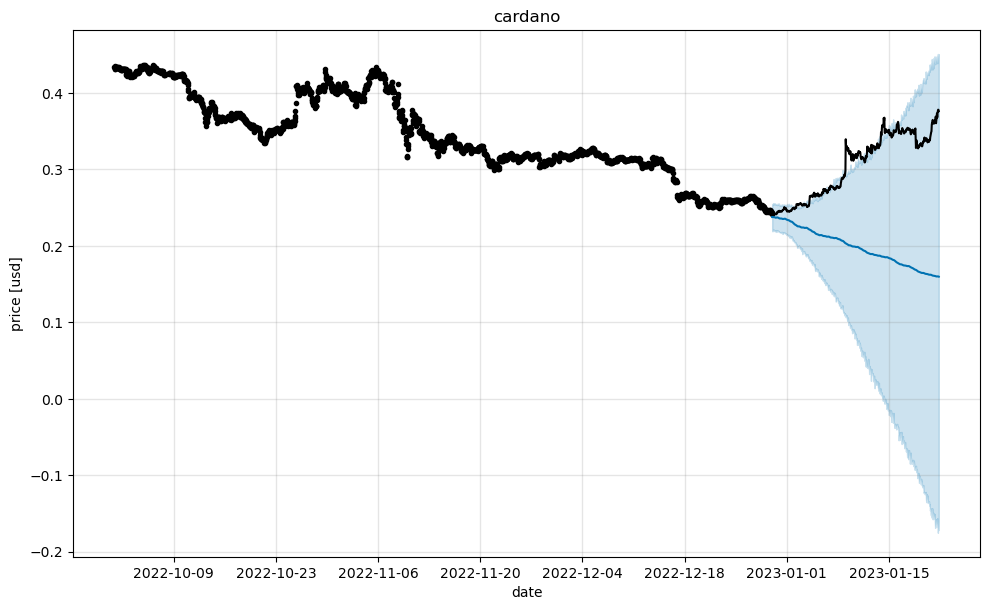

dogecoin
MSE = 0.0006985726158556781
MAE = 0.022467764956001345
R2 = -17.577602517197057



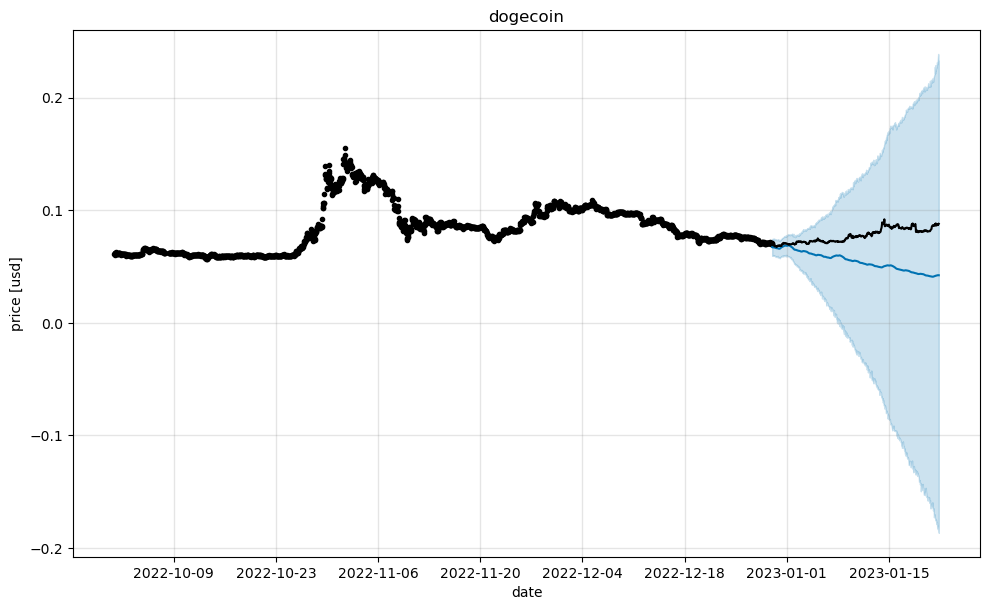

ethereum
MSE = 82776.68941409748
MAE = 227.48691641881854
R2 = -2.6305381939689494



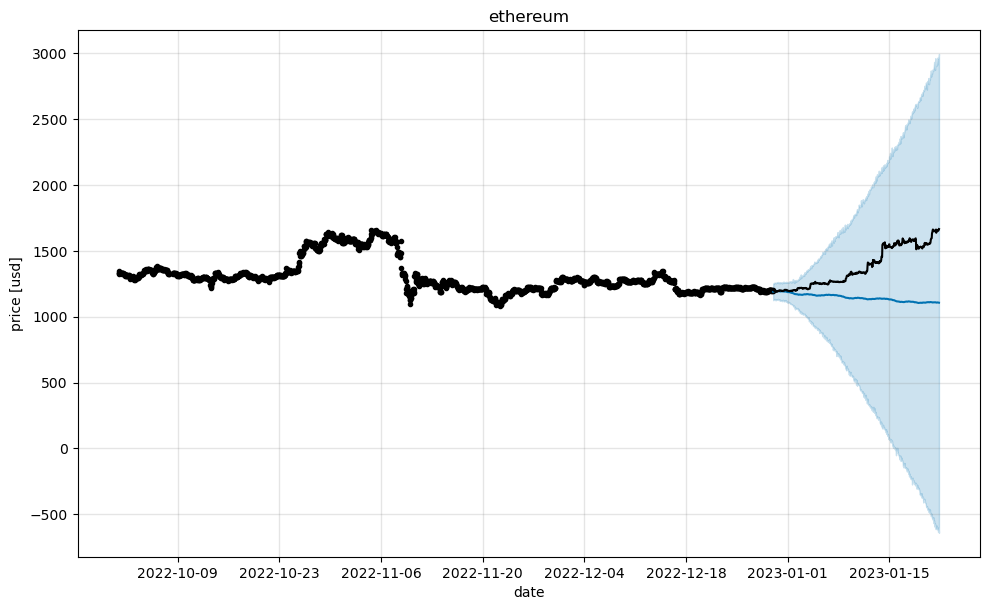

solana
MSE = 110.24991029082535
MAE = 8.550110624101153
R2 = -3.4620152361726113



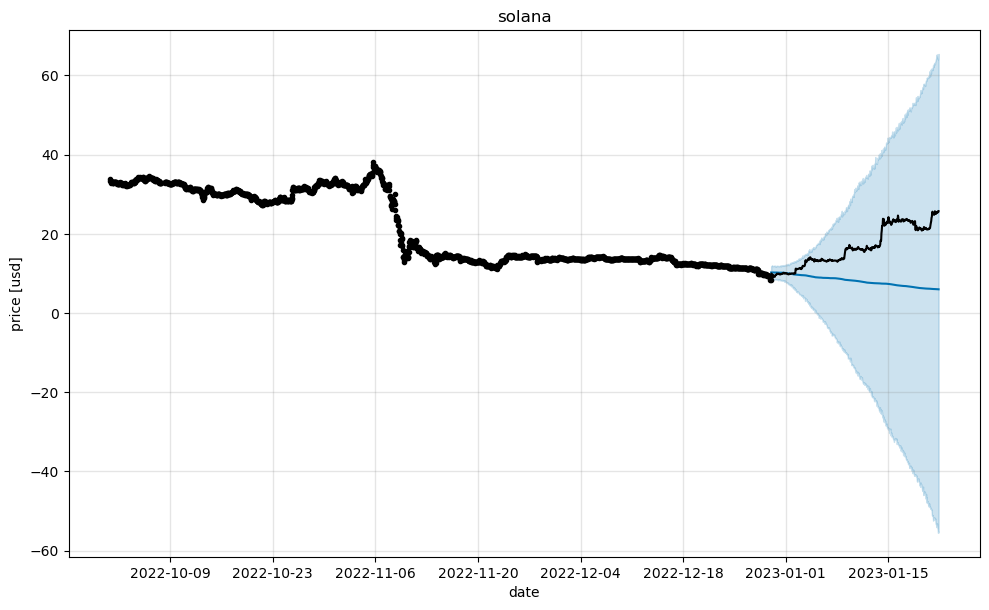

xrp
MSE = 0.0032441334830269116
MAE = 0.044907037368850336
R2 = -5.001289350137118



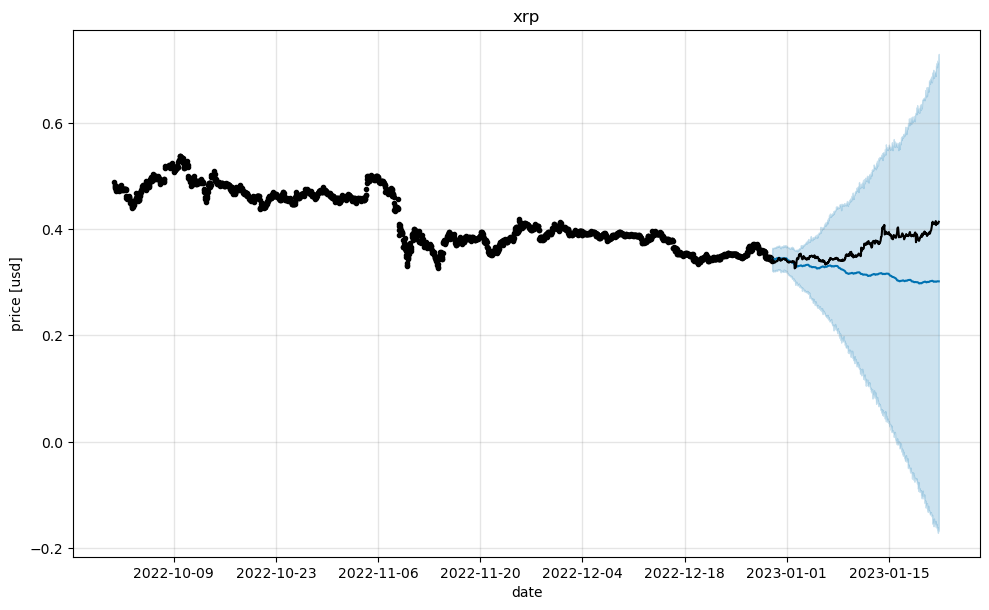

In [4]:
show_results('crypto_sentiment_train_table', 'test_prophet', '2022-12-30')

23/01/22 05:25:16 WARN org.apache.hadoop.util.concurrent.ExecutorHelper: Thread (Thread[GetFileInfo #1,5,main]) interrupted: 
java.lang.InterruptedException
	at com.google.common.util.concurrent.AbstractFuture.get(AbstractFuture.java:510)
	at com.google.common.util.concurrent.FluentFuture$TrustedFuture.get(FluentFuture.java:88)
	at org.apache.hadoop.util.concurrent.ExecutorHelper.logThrowableFromAfterExecute(ExecutorHelper.java:48)
	at org.apache.hadoop.util.concurrent.HadoopThreadPoolExecutor.afterExecute(HadoopThreadPoolExecutor.java:90)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)


Full model
MSE = 1294145.2547538416
MAE = 354.1046978689769
R2 = 0.9725356973766008

bitcoin
MSE = 7680873.138876412
MAE = 1886.1941571610225
R2 = -0.816863469763935



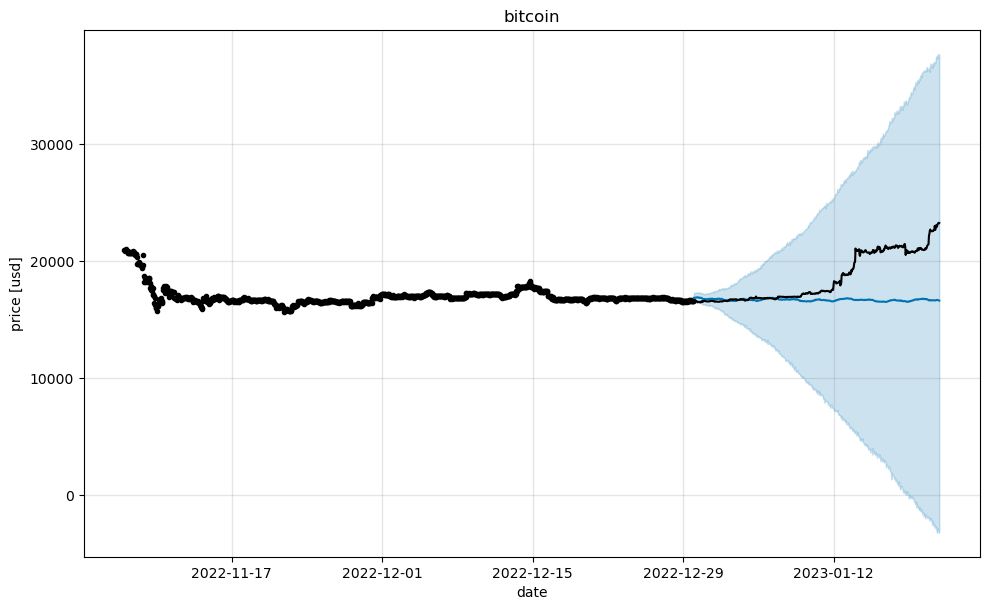

cardano
MSE = 0.0152384417218825
MAE = 0.10536705752255175
R2 = -7.882412130823907



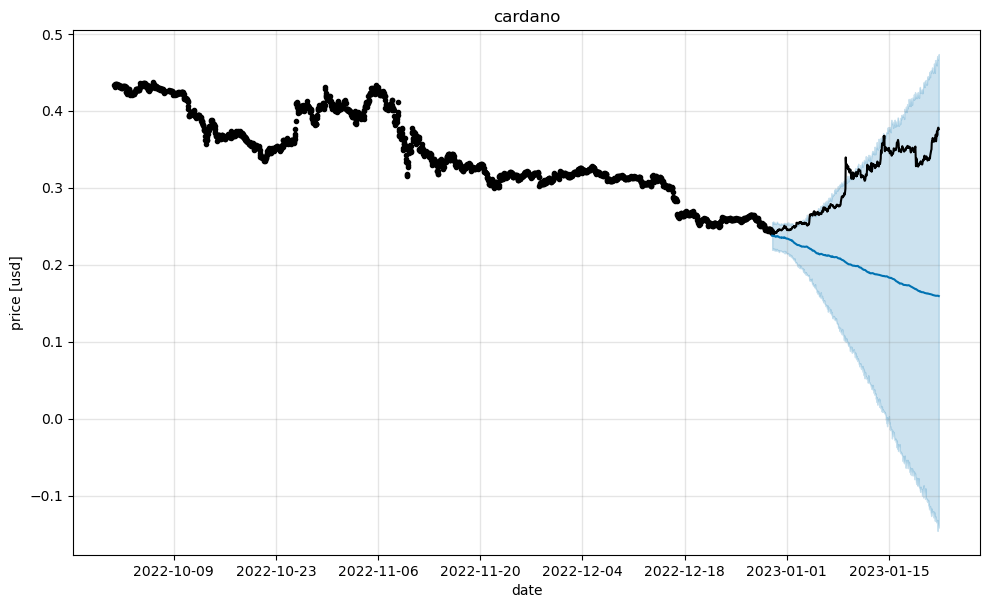

dogecoin
MSE = 0.0006992450533007261
MAE = 0.02247928752288131
R2 = -17.595485089872025



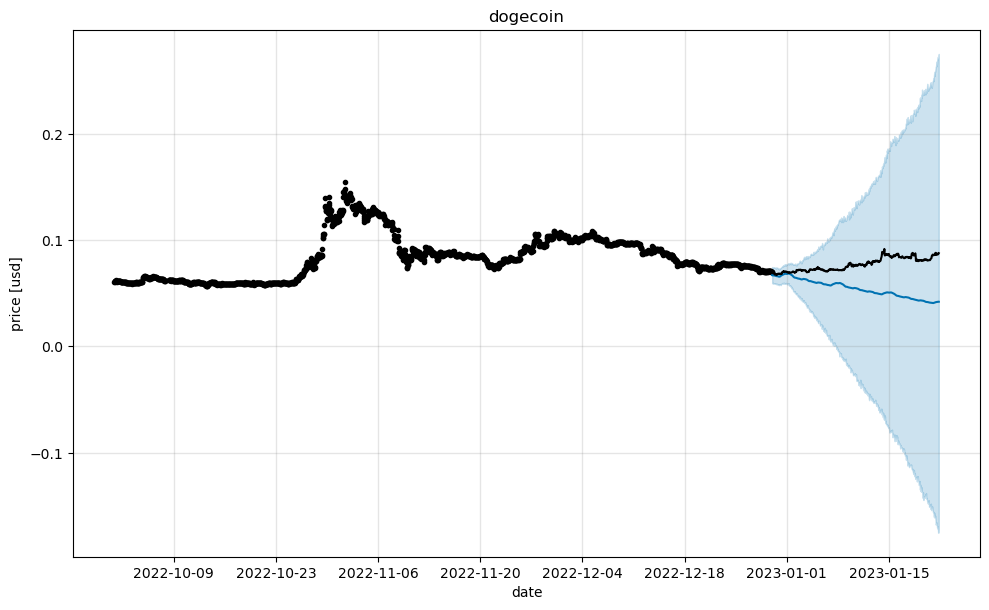

ethereum
MSE = 83889.26679249658
MAE = 229.75272398619532
R2 = -2.6793352006457574



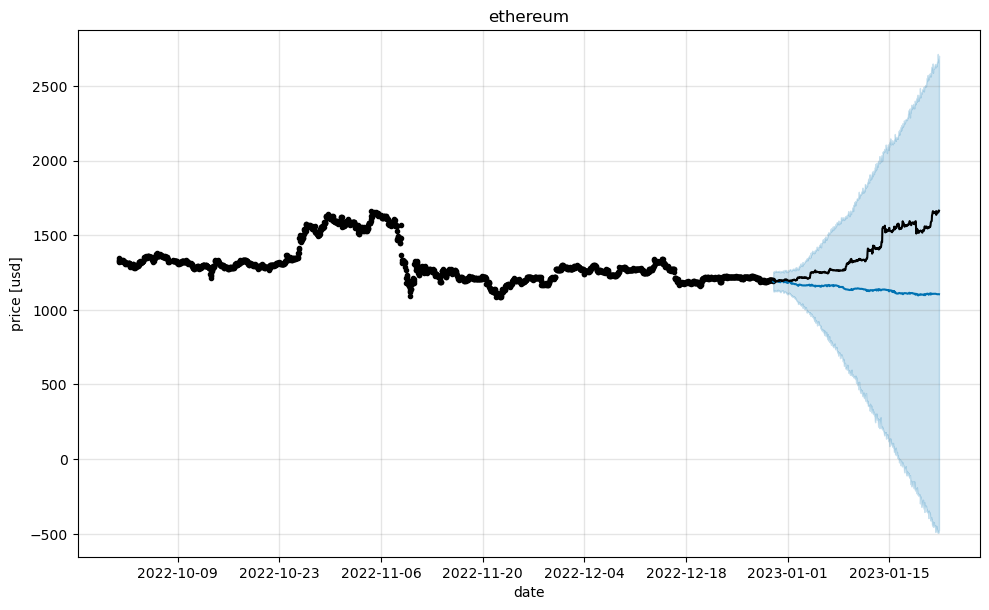

solana
MSE = 109.10327417575544
MAE = 8.505048307470812
R2 = -3.415608778314355



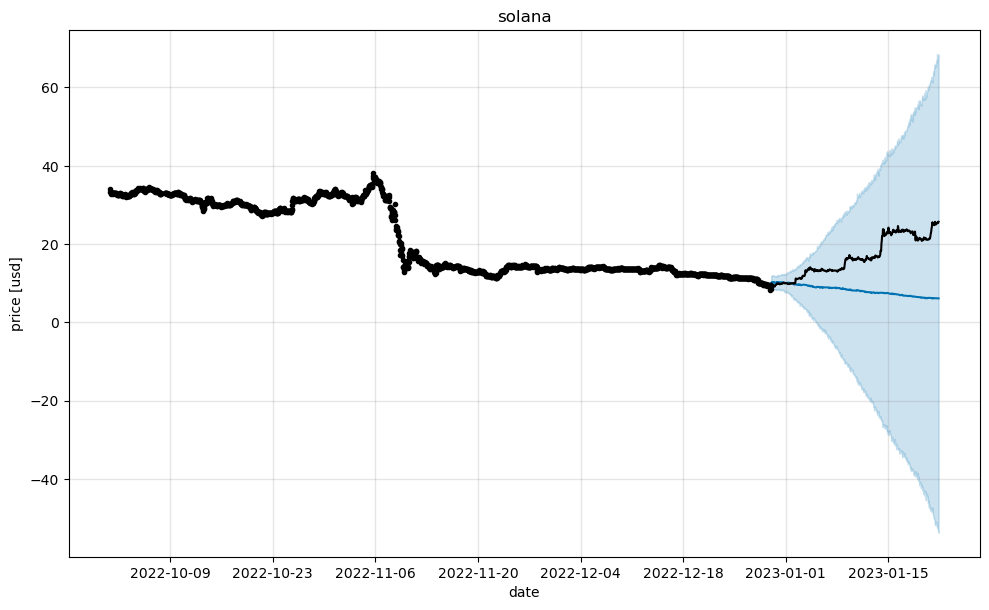

xrp
MSE = 0.003642276282527195
MAE = 0.048411414127158645
R2 = -5.737809642836495



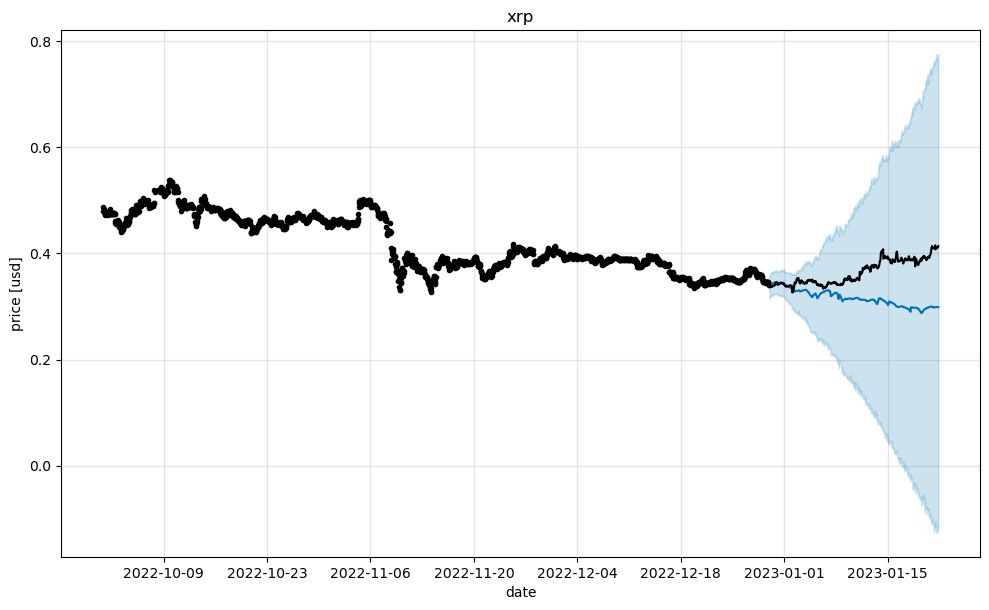

In [5]:
show_results('crypto_sentiment_train_table', 'test_sentiment_prophet', '2022-12-30')

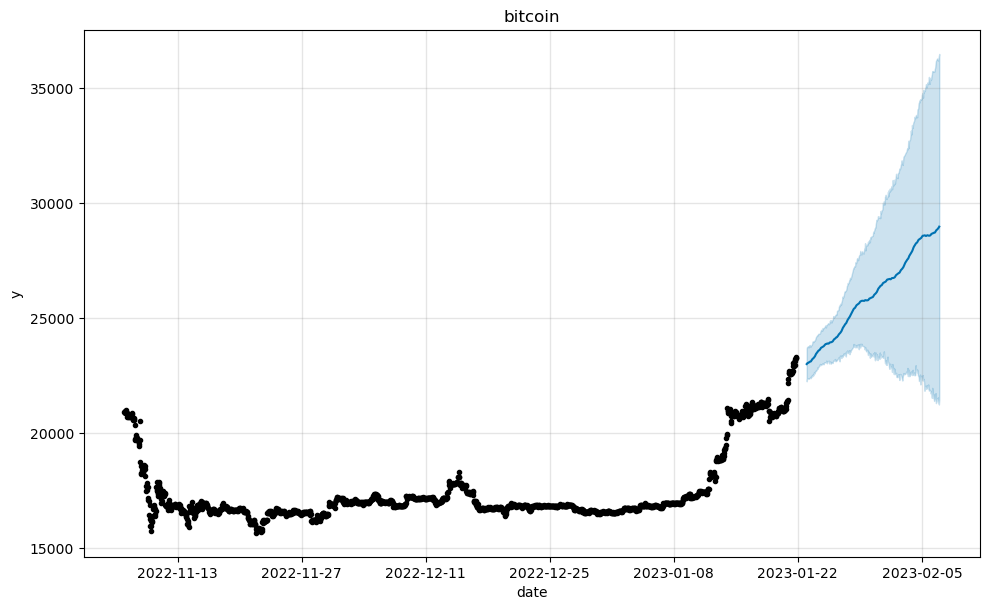

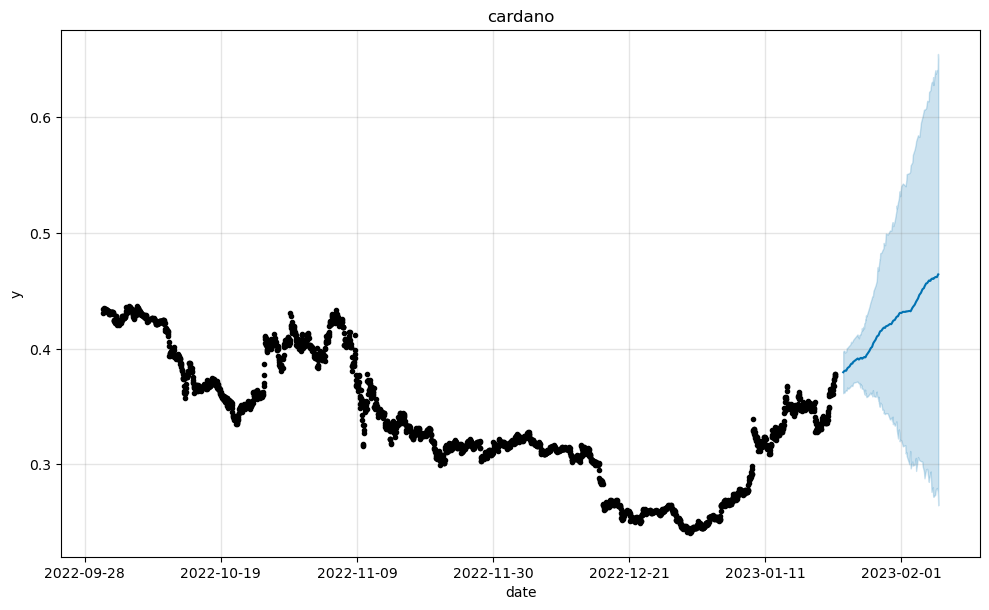

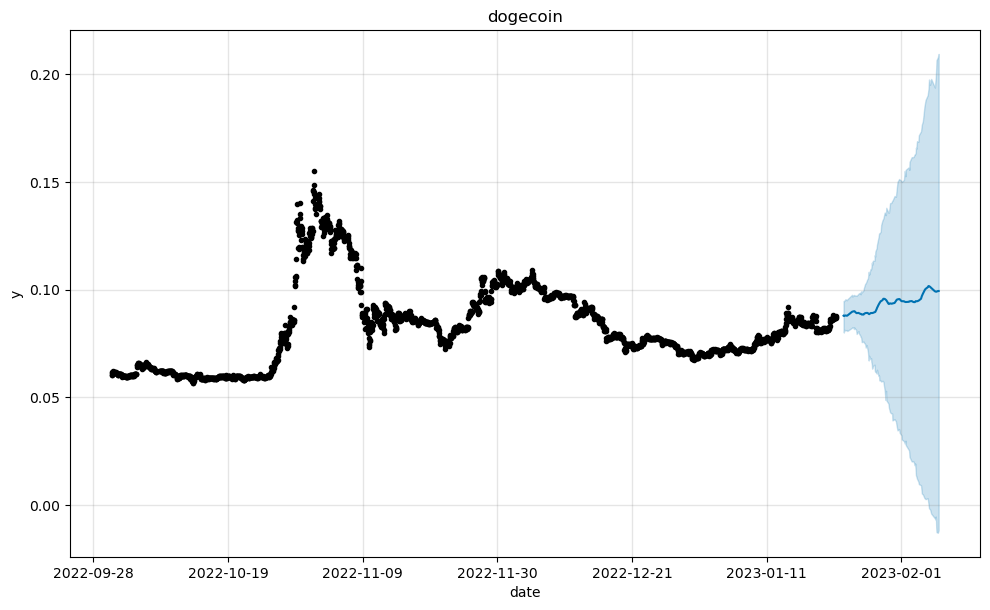

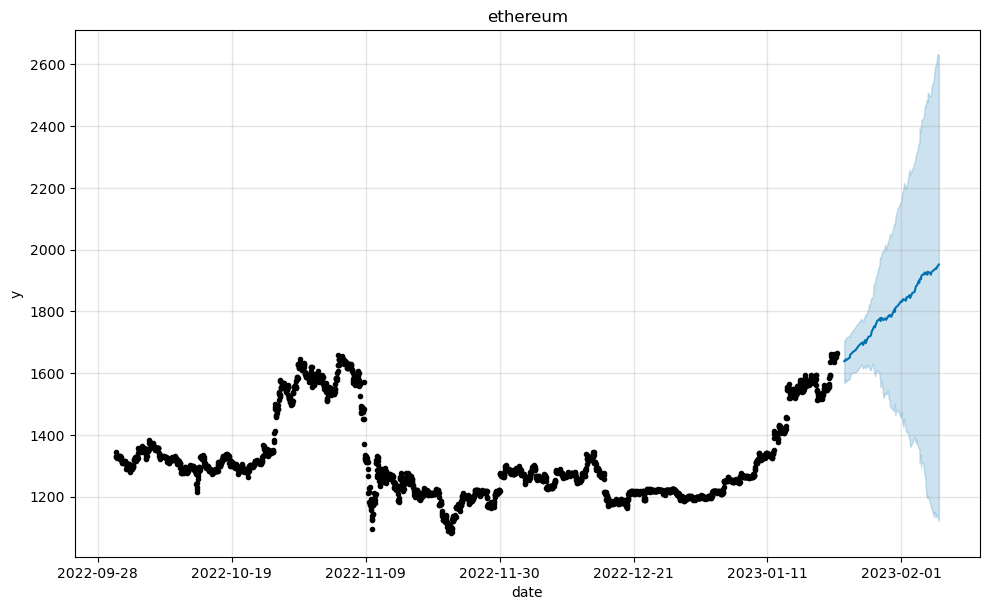

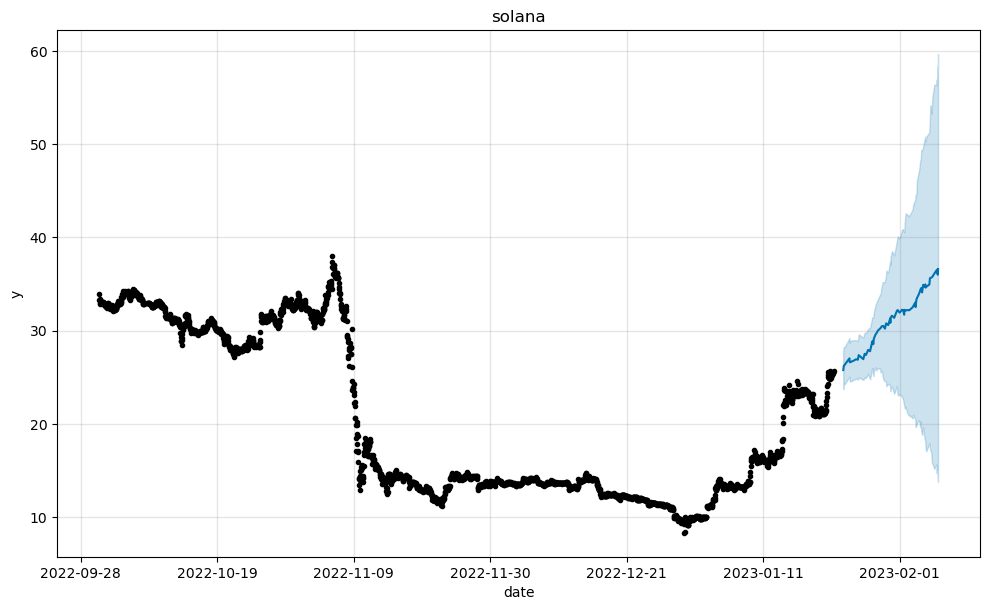

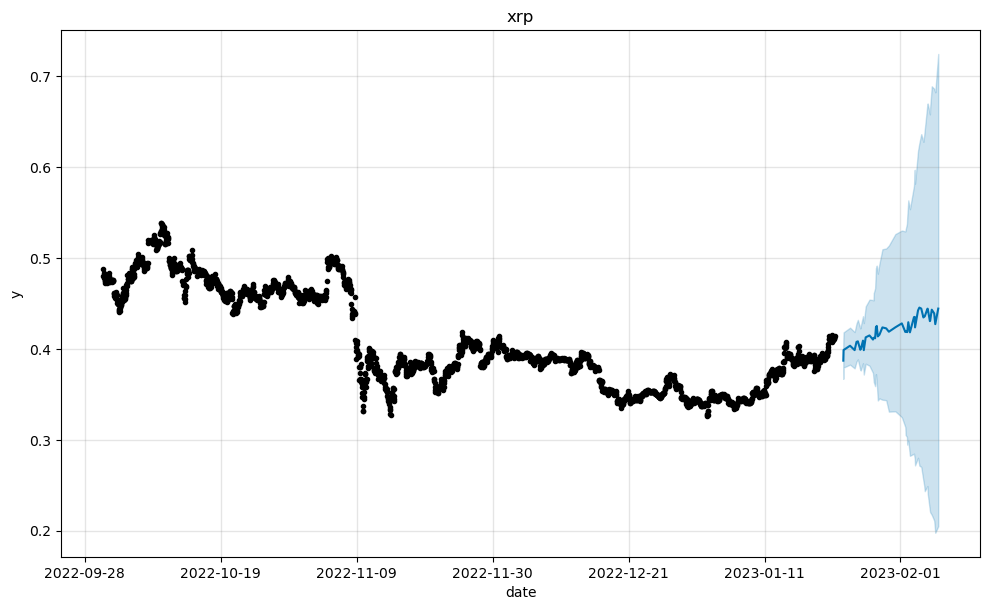

In [8]:
pred_df = spark.read.csv(f'/user/bda_reddit_pw/models/results/sentiment_prophet', inferSchema=True, header=True)
df = pred_df.toPandas()

cryptos = np.unique(df.cryptocurrency)
for crypto in cryptos:
    df_c = df[df.cryptocurrency == crypto]

    model_path_curr = f'prophet_model_{crypto}.json'
    cmd = f'hdfs dfs -copyToLocal /user/bda_reddit_pw/models/sentiment_prophet/{model_path_curr} .'
    os.system(cmd)
    with open(model_path_curr, 'r') as fin:
        model = model_from_json(fin.read())
    os.remove(model_path_curr)

    df_c = df[df.cryptocurrency == crypto]
    model.plot(df_c)
    plt.title(crypto)
    plt.xlabel('date')

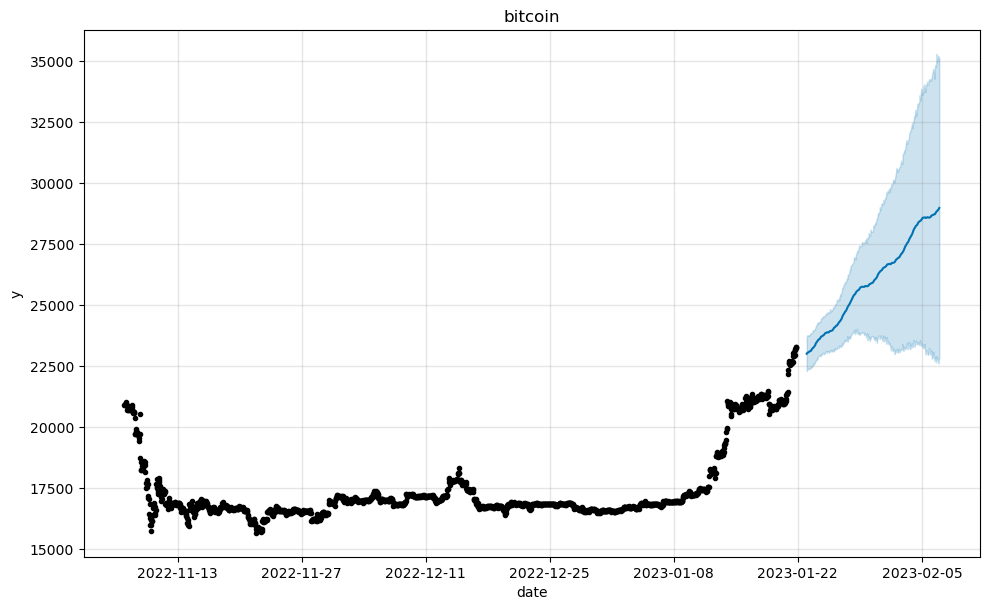

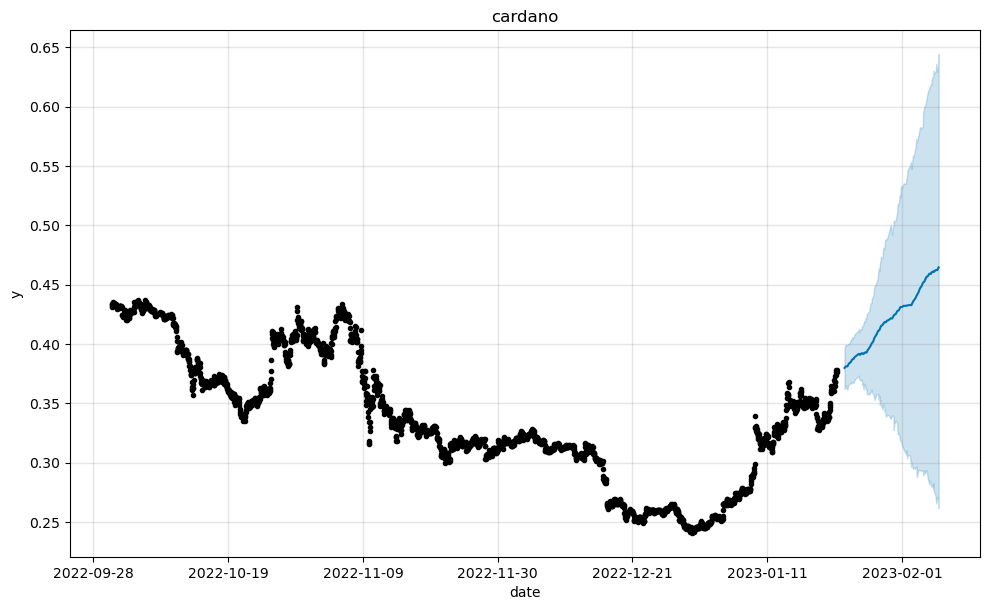

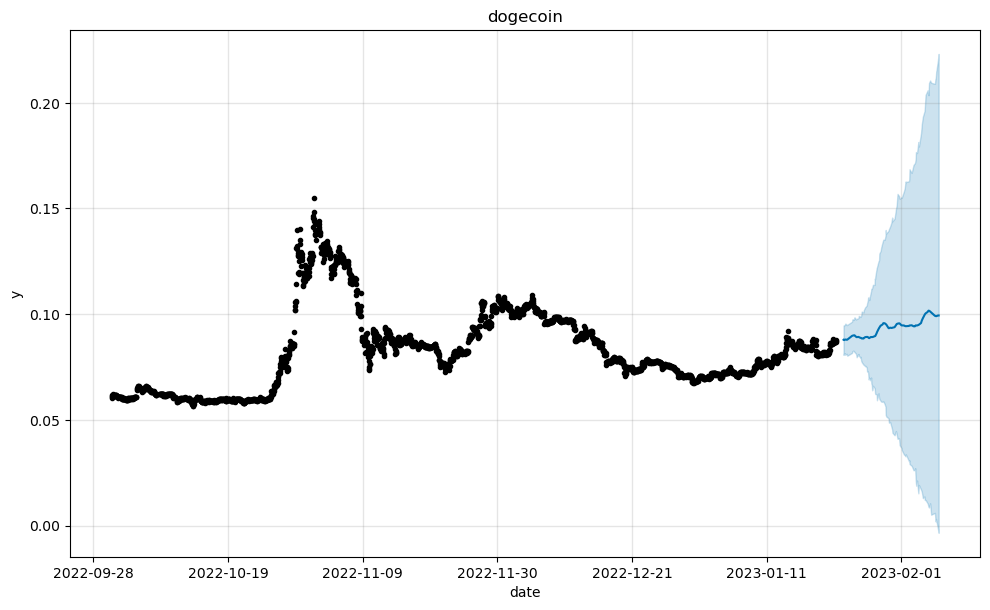

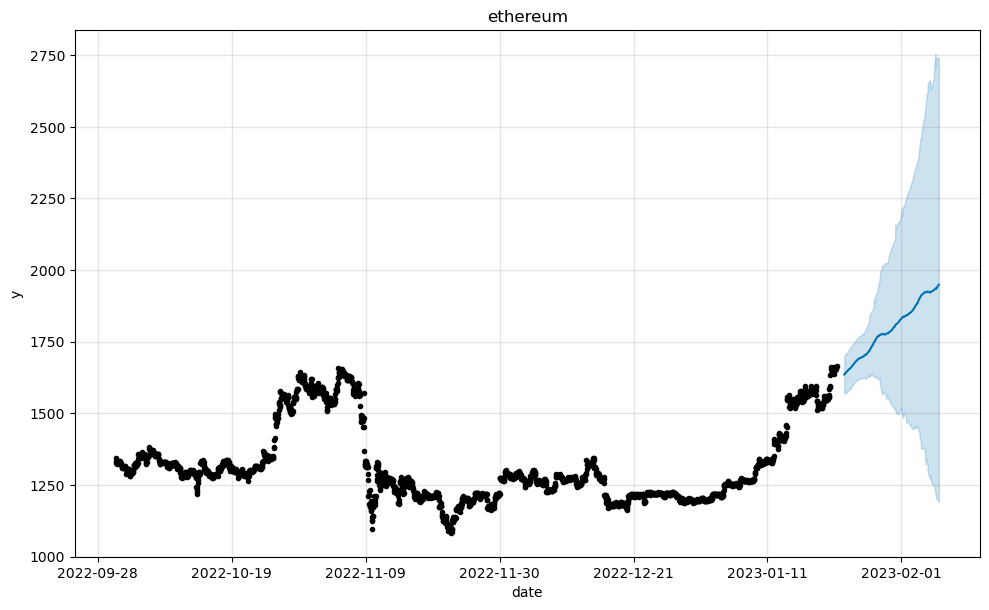

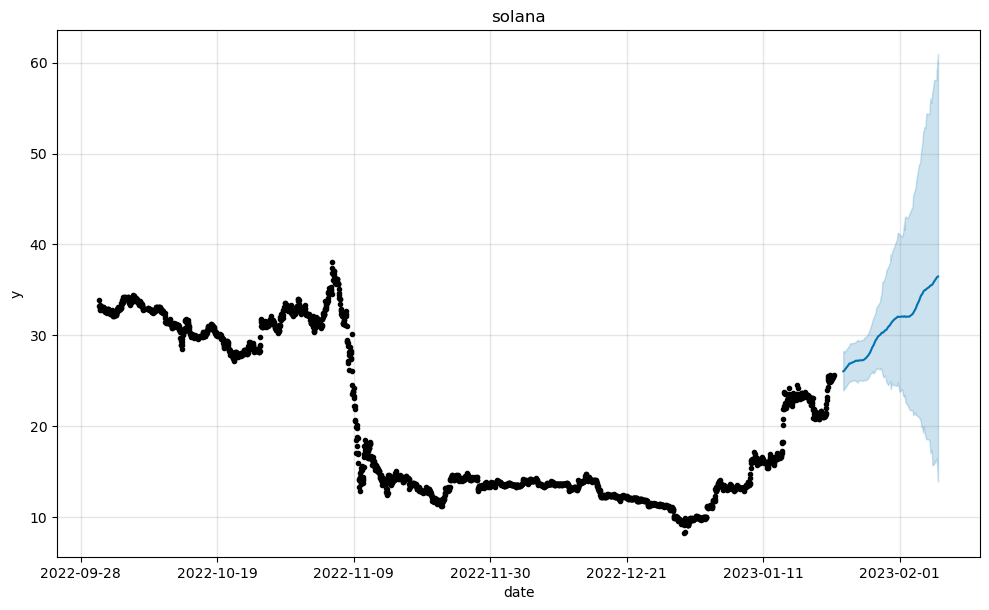

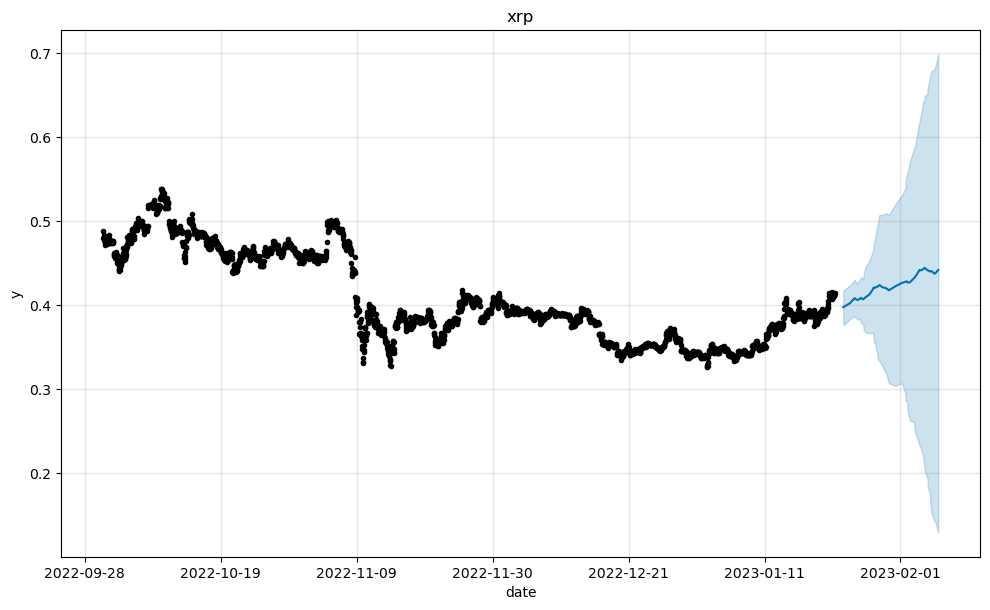

In [9]:
pred_df = spark.read.csv(f'/user/bda_reddit_pw/models/results/price_prophet', inferSchema=True, header=True)
df = pred_df.toPandas()

cryptos = np.unique(df.cryptocurrency)
for crypto in cryptos:
    df_c = df[df.cryptocurrency == crypto]

    model_path_curr = f'prophet_model_{crypto}.json'
    cmd = f'hdfs dfs -copyToLocal /user/bda_reddit_pw/models/price_prophet/{model_path_curr} .'
    os.system(cmd)
    with open(model_path_curr, 'r') as fin:
        model = model_from_json(fin.read())
    os.remove(model_path_curr)

    df_c = df[df.cryptocurrency == crypto]
    model.plot(df_c)
    plt.title(crypto)
    plt.xlabel('date')

In [ ]:
 help(Prophet.add_regressor)